In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.0f}'.format
# pd.options.display.int_format ='{:,}'.format

import os
from operator import itemgetter    
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')


## Exploring Surgery Characteristics

**Purpose**:   
The purpose of this section is to understand and idenify parameters related to the operations. 

**Deliverables**:
1. List of Top X surgeries by volume. 
2. List of surgeries with greatest count of LOS outliers. 

**Out of scope:**
- Patient demographic and clinical value features are not considered. 



In [2]:
import_csv_file = '../_data/operations_fulldata.csv'
df = pd.read_csv(import_csv_file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200593 entries, 0 to 200592
Data columns (total 55 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   op_id              200593 non-null  int64  
 1   subject_id         200593 non-null  int64  
 2   hadm_id            200593 non-null  int64  
 3   opdate             200593 non-null  int64  
 4   age                200593 non-null  int64  
 5   sex                200593 non-null  object 
 6   weight             198158 non-null  float64
 7   height             199124 non-null  float64
 8   race               200593 non-null  object 
 9   asa                194133 non-null  float64
 10  emop               200593 non-null  int64  
 11  department         200593 non-null  object 
 12  antype             200593 non-null  object 
 13  icd10_pcs          200593 non-null  object 
 14  category_desc      200593 non-null  object 
 15  desc_short         200593 non-null  object 
 16  ca

In [3]:
# calculate teh operation durations and add to DF
df['op_duration']=df['orout_time']-df['orin_time']
df['LOS']=(df['discharge_time']-df['orout_time'])/1440 # LOS is time following surgery to dishcarge converted to days. 
operations_info = df.loc[:,['op_id','category_id','category_desc','desc_short', 'icd10_pcs', 'orin_time','orout_time', 'op_duration', 'LOS']]

operations_info.describe()



,op_id,orin_time,orout_time,op_duration,LOS
count,"200,593","200,593","200,593","200,593","200,593"
mean,"450,245,944","408,124","408,291",167,12
std,"28,913,336","875,161","875,153",135,44
min,"400,000,455",-20,60,10,-3
25%,"425,170,101","2,190","2,340",80,2
50%,"450,430,921","3,790","4,015",130,4
75%,"475,410,270","311,580","311,765",215,8
max,"499,999,032","5,185,065","5,185,170","13,125","3,728"


In [4]:

operations_pivot = pd.pivot_table(
        operations_info, 
        values=['op_id','op_duration'],
        index=['category_id','category_desc', 'icd10_pcs','desc_short'],
        aggfunc={'op_id':'count','op_duration':'mean'} )
operations_pivot = operations_pivot.sort_values(by='op_id', ascending=False)

operations_pivot



op_duration  \
category_id category_desc               icd10_pcs desc_short                                                  
08D         Eye                         08DJ3     Extraction of Right Lens                               50   
0HD         Skin and Breast             0HD0X     Extraction of Scalp Skin                              116   
0TB         Urinary System              0TBB8     Excision of Bladder                                    55   
09Q         Ear                         09Q70     Repair Right Tympanic Membrane                        144   
08R         Eye                         08R43     Replacement of Right Vitreous with Autol Sub           85   
...                                                                                                     ...   
0PP         Upper Bones                 0PP0X     Removal of Int Fix from Sternum                        95   
                                        0PPC0     Removal of Int Fix from R Humeral Head                 75   
07B         Lymphatic and Hemic Systems 07BC4     Excision of Pelvis Lymphatic                          175   
                                        07BP0     Excision of Spleen                                    240   
0QT         Lower Bones                 0QT70     Resection of Left Upper Femur                         285   

                                                                                                op_id  
category_id category_desc               icd10_pcs desc_short                                           
08D         Eye                         08DJ3     Extraction of Right Lens                       9189  
0HD         Skin and Breast             0HD0X     Extraction of Scalp Skin                       5893  
0TB         Urinary System              0TBB8     Excision of Bladder                            5802  
09Q         Ear                         09Q70     Repair Right Tympanic Membrane                 5517  
08R         Eye                         08R43     Replacement of Right Vitreous with Autol Sub   4826  
...                                                                                               ...  
0PP         Upper Bones                 0PP0X     Removal of Int Fix from Sternum                   1  
                                        0PPC0     Removal of Int Fix from R Humeral Head            1  
07B         Lymphatic and Hemic Systems 07BC4     Excision of Pelvis Lymphatic                      1  
                                        07BP0     Excision of Spleen                                1  
0QT         Lower Bones                 0QT70     Resection of Left Upper Femur                     1  

[1609 rows x 2 columns]

In [13]:
## Reduce the scope of the data frame to include the Top X surgeries. 

TOP_X_SURGERIES = 20

# This will count occurrences of each 'icd10_pcs' code
counts = operations_info[['icd10_pcs','desc_short']].value_counts()

# # Take the top 100 most common 'icd10_pcs' codes
top_surg_summary_df = pd.DataFrame(counts.head(TOP_X_SURGERIES))
top_surg_summary_df


,,count
icd10_pcs,desc_short,
08DJ3,Extraction of Right Lens,9189
0HD0X,Extraction of Scalp Skin,5893
0TBB8,Excision of Bladder,5802
09Q70,Repair Right Tympanic Membrane,5517
08R43,Replacement of Right Vitreous with Autol Sub,4826
0HBT0,Excision of Right Breast,3676
0TBB7,Excision of Bladder,3536
0FT44,Resection of Gallbladder,3473
0GTK0,Resection of Thyroid Gland,3398


### Histogram of surgery types

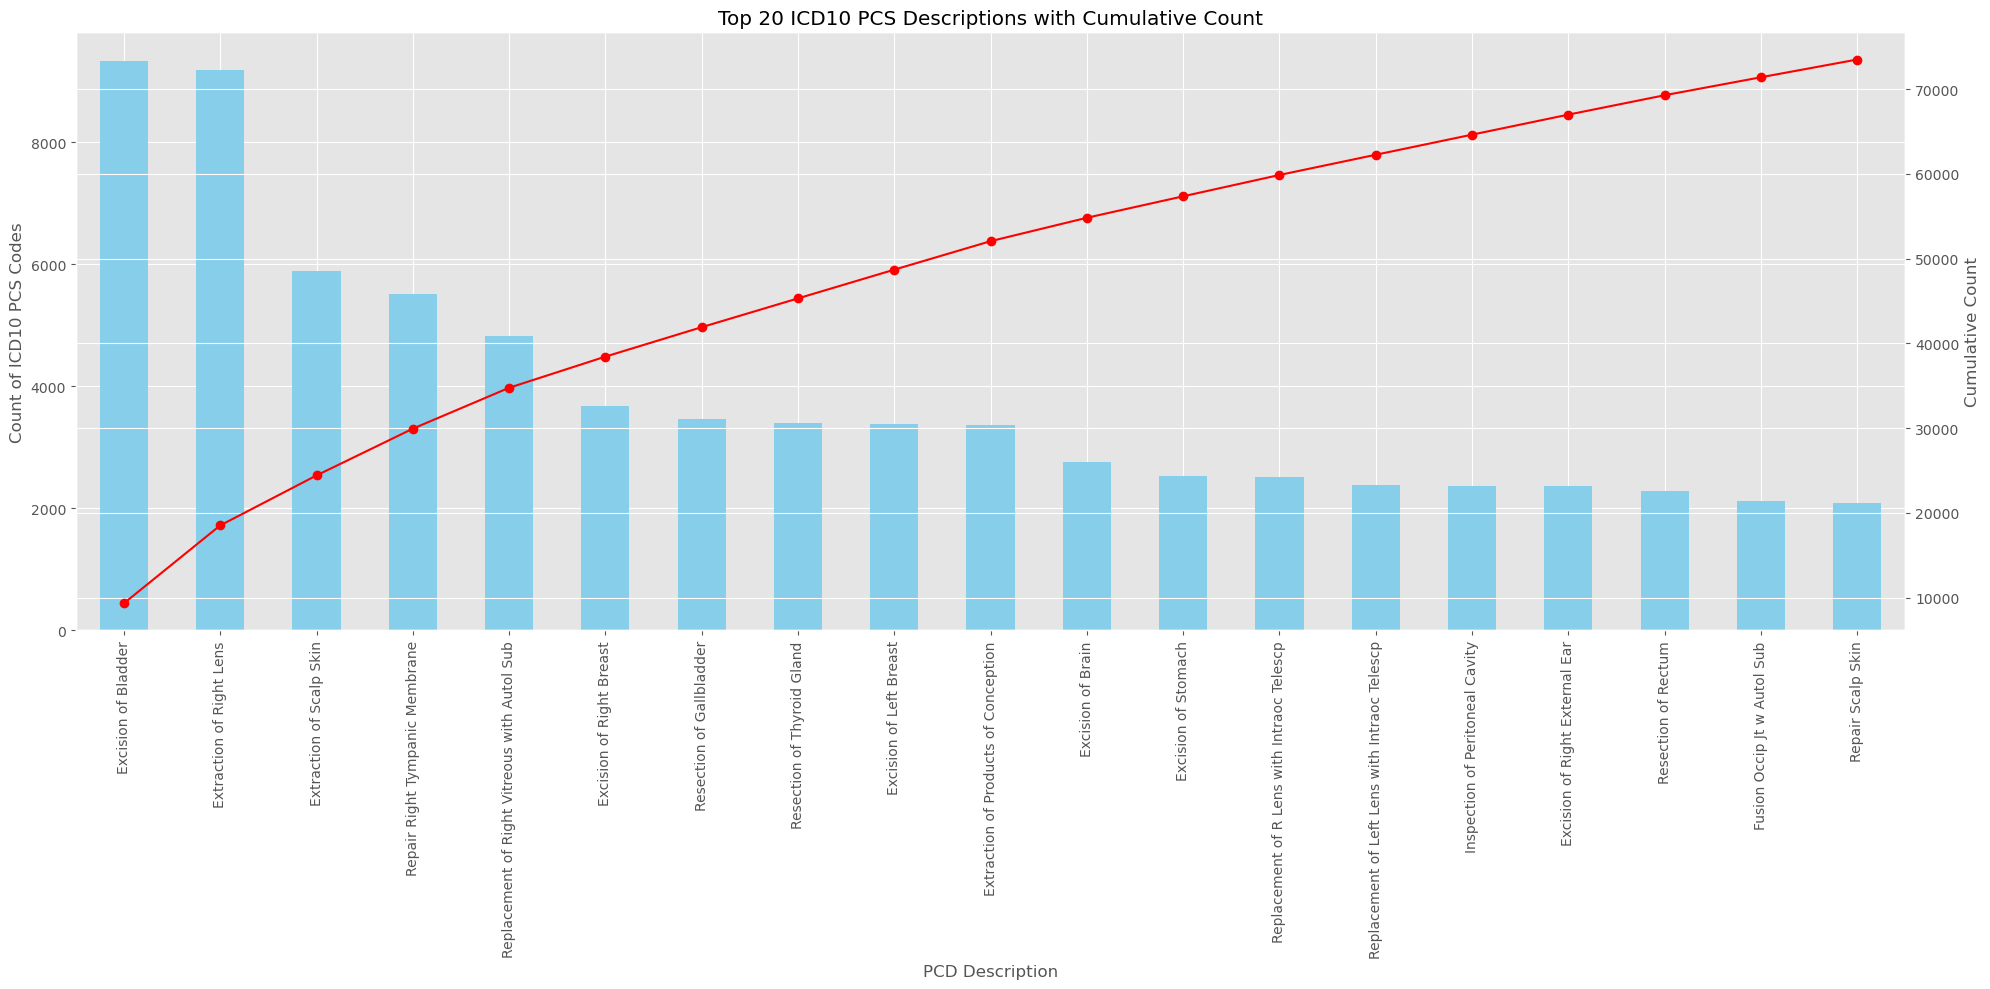

In [16]:
counts = operations_info['icd10_pcs'].value_counts()

# Get the top 100 codes
top_codes = counts.head(TOP_X_SURGERIES).index

# Now, filter the DataFrame to these top 100 codes
top_100_df = operations_info[operations_info['icd10_pcs'].isin(top_codes)]

# Next, group by the 'PCD_description' and count the occurrences
description_counts = top_100_df.groupby('desc_short').size().sort_values(ascending=False)


# Now plot the bar chart using these counts
fig, ax1 = plt.subplots(figsize=(20, 10))  # Adjust the size as needed

# Bar chart for the count of each PCD_description
description_counts.plot(kind='bar', color='skyblue', ax=ax1)

# Labels and titles
ax1.set_title(f'Top {TOP_X_SURGERIES} ICD10 PCS Descriptions with Cumulative Count')
ax1.set_xlabel('PCD Description')
ax1.set_ylabel('Count of ICD10 PCS Codes')

# Rotate the descriptions for better readability
ax1.tick_params(axis='x', rotation=90)

# Create a secondary y-axis for the cumulative count
ax2 = ax1.twinx()

# Calculate the cumulative sum and plot as a line on the secondary y-axis
description_counts.cumsum().plot(kind='line', color='red', ax=ax2, marker='o')

# Secondary y-axis label
ax2.set_ylabel('Cumulative Count')

# Make sure layout is tight so labels don't get cut off
fig.tight_layout()

# Show plot with a grid for the secondary y-axis
ax2.grid(True)

plt.show()